In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score
from urllib.request import urlopen
from io import StringIO
from google.colab import drive
import random
from imblearn.metrics import specificity_score

In [11]:
# 1. Google Drive 마운트 및 데이터 파일 경로 설정
drive.mount('/content/drive')
train_file_path = '/content/drive/MyDrive/PhalangesOutlinesCorrect/PhalangesOutlinesCorrect_TRAIN.txt'
test_file_path = '/content/drive/MyDrive/PhalangesOutlinesCorrect/PhalangesOutlinesCorrect_TEST.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# 2. 데이터 로드 함수 정의 (공백 제거 및 정리 추가)
def load_ucr(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    cleaned_data = []
    for line in lines:
        cleaned_line = line.strip().split()  # 공백 제거 후 리스트로 변환
        cleaned_data.append([float(value) for value in cleaned_line])

    data = np.array(cleaned_data)
    X = data[:, 1:]
    y = data[:, 0]
    y = np.where(y == min(y), 0, 1)  # 이진 클래스 변환 (0, 1)
    return X, y

In [13]:
# 데이터 로드
X_train, y_train = load_ucr(train_file_path)
X_test, y_test = load_ucr(test_file_path)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1800, 80)
(1800,)
(858, 80)
(858,)


In [14]:
# 3. 데이터 샘플링 (10% 랜덤 추출)
def sample_data(X, y, sample_ratio):
    sample_size = int(len(X) * sample_ratio)
    indices = np.random.choice(len(X), sample_size, replace=False)
    return X[indices], y[indices]

X_tr_0 = X_train[y_train == 0]
y_tr_0 = y_train[y_train == 0]
X_tr_1 = X_train[y_train == 1]
y_tr_1 = y_train[y_train == 1]

X_tr_1_sample, y_tr_1_sample = sample_data(X_tr_1, y_tr_1, 0.1)
X_tr_0_sample, y_tr_0_sample = sample_data(X_tr_0, y_tr_0, 0.01)
X_test_sample, y_test_sample = sample_data(X_test, y_test, 0.1)

In [20]:
print(X_tr_1.shape)
print(y_tr_1.shape)
print(X_tr_0.shape)
print(y_tr_0.shape)

(1172, 80)
(1172,)
(628, 80)
(628,)


In [15]:
print(X_tr_1_sample.shape)
print(y_tr_1_sample.shape)
print(X_tr_0_sample.shape)
print(y_tr_0_sample.shape)
print(X_test_sample.shape)
print(y_test_sample.shape)

(117, 80)
(117,)
(6, 80)
(6,)
(85, 80)
(85,)


In [16]:
X_train_sample = np.concatenate((X_tr_1_sample, X_tr_0_sample))
y_train_sample = np.concatenate((y_tr_1_sample, y_tr_0_sample))

In [17]:
print(X_train_sample.shape)
print(y_train_sample.shape)
print(X_test_sample.shape)
print(y_test_sample.shape)

(123, 80)
(123,)
(85, 80)
(85,)


In [18]:
pd.DataFrame(X_train_sample).to_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/X_train_sample.csv', index=False)
pd.DataFrame(y_train_sample).to_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/y_train_sample.csv', index=False)
pd.DataFrame(X_test_sample).to_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/X_test_sample.csv', index=False)
pd.DataFrame(y_test_sample).to_csv('/content/drive/MyDrive/PhalangesOutlinesCorrect/y_test_sample.csv', index=False)

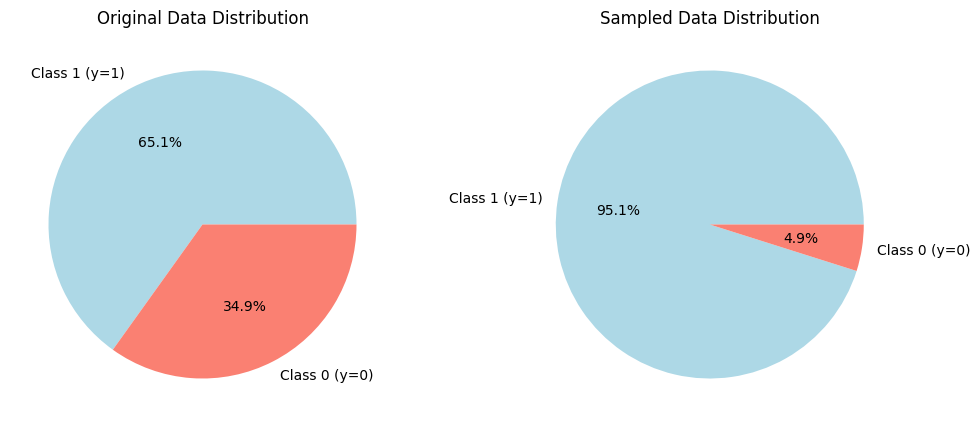

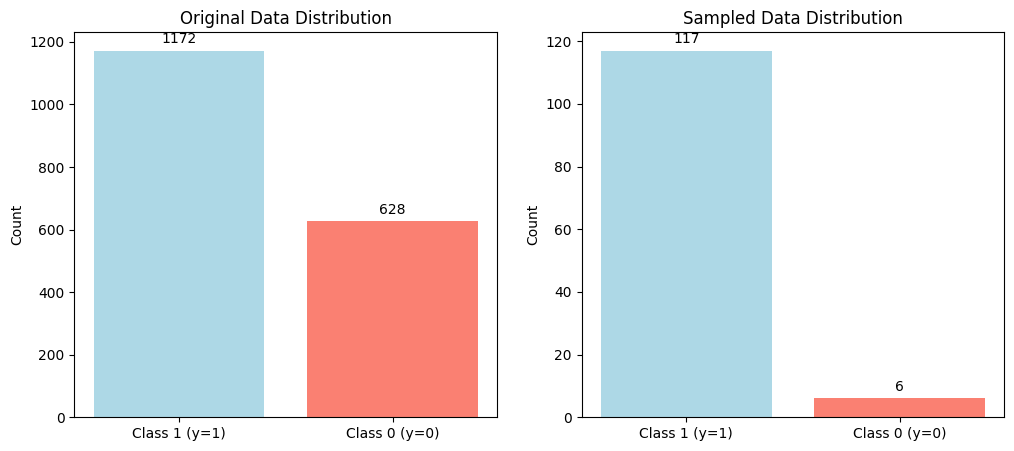

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분포
original_counts = {"Class 1 (y=1)": 1172, "Class 0 (y=0)": 628}
sampled_counts = {"Class 1 (y=1)": 117, "Class 0 (y=0)": 6}

# 원 그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(original_counts.values(), labels=original_counts.keys(), autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0].set_title("Original Data Distribution")

axes[1].pie(sampled_counts.values(), labels=sampled_counts.keys(), autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[1].set_title("Sampled Data Distribution")

plt.show()

# 막대그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 원본 데이터 분포
bar1 = axes[0].bar(original_counts.keys(), original_counts.values(), color=['lightblue', 'salmon'])
axes[0].set_title("Original Data Distribution")
axes[0].set_ylabel("Count")
axes[0].bar_label(bar1, fmt='%d', padding=3)  # 막대 위에 값 표시

# 샘플링된 데이터 분포
bar2 = axes[1].bar(sampled_counts.keys(), sampled_counts.values(), color=['lightblue', 'salmon'])
axes[1].set_title("Sampled Data Distribution")
axes[1].set_ylabel("Count")
axes[1].bar_label(bar2, fmt='%d', padding=3)  # 막대 위에 값 표시

plt.show()
